In [2]:
import seaborn as sns
import pandas as pd 

planets = sns.load_dataset("planets")
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [3]:
# Verinin hikayesi nedir ?


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
method            1035 non-null object
number            1035 non-null int64
orbital_period    992 non-null float64
mass              513 non-null float64
distance          808 non-null float64
year              1035 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [5]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=1035, step=1)

In [7]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [8]:
df.method = pd.Categorical(df.method)
# object tipini kategori yapıyoruz


In [9]:
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

In [10]:
df.shape

(1035, 6)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


 Eksik değerlerin incelenmesi


In [12]:
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [13]:
df.isnull()

,method,number,orbital_period,mass,distance,year
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1030,False,False,False,True,False,False
1031,False,False,False,True,False,False
1032,False,False,False,True,False,False
1033,False,False,False,True,False,False


In [14]:
df.isnull().values

array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       ...,
       [False, False, False,  True, False, False],
       [False, False, False,  True, False, False],
       [False, False, False,  True, False, False]])

In [15]:
df.isnull().values.any()
# df içindeki değerlerde en az 1 tane boş değer var mı 



True

In [16]:
df.isnull().sum()
#hangi değişkende kaç tane na değer olduğunu getirir

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [17]:
df["orbital_period"].fillna(df["orbital_period"].mean() ,inplace = True)
# orbitalin ortalamasını , orbitaldeki boş değerlere atayıp bu işlemi kaydettik





In [18]:
df.isnull().sum()

method              0
number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

In [19]:
df.mass.fillna(0 ,inplace = True)

In [20]:
df.isnull().sum()

method              0
number              0
orbital_period      0
mass                0
distance          227
year                0
dtype: int64

# Kategorik değiskenin özeti 

In [21]:
import pandas as pd 
import seaborn as sns 
planets = sns.load_dataset("planets")
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [22]:
df_kat = df.select_dtypes(["object"])
# df içerisinde data tipi object olanları seçiyorum

In [6]:
df_kat.tail()

,method
1030,Transit
1031,Transit
1032,Transit
1033,Transit
1034,Transit


Katagorik değişkenin sınıflarına ve sınıf sayılarına erişmek

In [1]:
# şimdi method sutununun kaç tane farklı Katagorit değer olduğuna bakalım 
df["method"].unique()

NameError: name 'df' is not defined

In [18]:
# şimdi ise kaç tane farklı metot değeri var onun sayını alalım
df.method.value_counts().count()

10

Katagorik değişkenin sınıflarının Frekansına erişmek

In [21]:
#simdi is bunalardan kaç tane olduğunun sayısını alalım 
df.method.value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

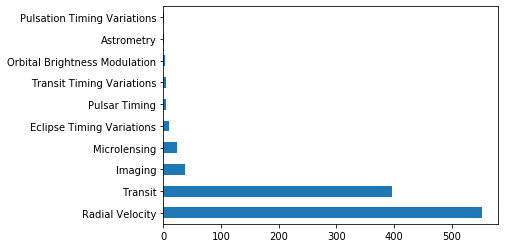

In [24]:
# üsteki değerlerin basıt gırafiğini çizmek
df.method.value_counts().plot.barh()

# Sürekli değiskenin özeti

In [25]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [28]:
df_sur = df.select_dtypes(include = ["float64" ,"int64"])
df_sur.tail()

,number,orbital_period,mass,distance,year
1030,1,3.941507,NaN,172.0,2006
1031,1,2.615864,NaN,148.0,2007
1032,1,3.191524,NaN,174.0,2007
1033,1,4.125083,NaN,293.0,2008
1034,1,4.187757,NaN,260.0,2008


In [31]:
df_sur.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [32]:
df_sur.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [38]:
df_sur.number.describe()

count    1035.000000
mean        1.785507
std         1.240976
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: number, dtype: float64

# Dağılım Grafikleri 

In [39]:
import pandas as pd 
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [42]:
df_num = df.select_dtypes(["float64" ,"int64"])
df_num.tail()
# Sürekli değişken olan NUmerik değerleri alıyoruz değerleri alıyoruz

,carat,depth,table,price,x,y,z
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,62.2,55.0,2757,5.83,5.87,3.64


In [43]:
df_cat = df.select_dtypes(["object"])
df_cat.head()
# Kategorik değişkenleri alıyoruz

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [44]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [50]:
df_cat.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

## Ordinal Tanımlama

In [54]:
from pandas.api.types import CategoricalDtype
df["cut"].astype(CategoricalDtype(ordered = True))
#burada df içindeki " cut " sutununun data tipinin cateğorik yaptık ve " ordered"
# fonksiyonu ile bunun bir sırası olduığunu belirttik ama sırası cıktıdaki gibi 
#değil birazdan bunun doğru sırasını manüel olarak gireceğiz

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: category
Categories (5, object): [Fair < Good < Ideal < Premium < Very Good]

In [57]:
from pandas.api.types import CategoricalDtype
cut_sira = ["Fair" , "Good" ,"Very Good" ,"Premium" ,"Ideal"]
df["cut"] = df["cut"].astype(CategoricalDtype(ordered = True , categories = cut_sira))
# evet  burada gerçek sırasınıda belirttik 
df["cut"]

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: category
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]

In [60]:
from pandas.api.types import CategoricalDtype
color_sir = ["J" , "I" ,"H" ,"G" ,"F" ,"E" ,"D"  ]
df["color"] = df["color"].astype(CategoricalDtype(ordered = True , categories = color_sir))
df["color"]




0        E
1        E
2        E
3        I
4        J
        ..
53935    D
53936    D
53937    D
53938    H
53939    D
Name: color, Length: 53940, dtype: category
Categories (7, object): [J < I < H < G < F < E < D]

In [64]:
from pandas.api.types import CategoricalDtype
clarity_sir = ["I1" , "SI2" ,"VS2" ,"VS1" ,"VVS2" ,"VVS1" ,"IF" ] 
df["clarity"] = df["clarity"].astype(CategoricalDtype(ordered = True , categories = clarity_sir))
df["clarity"]

0        SI2
1        NaN
2        VS1
3        VS2
4        SI2
        ... 
53935    NaN
53936    NaN
53937    NaN
53938    SI2
53939    SI2
Name: clarity, Length: 53940, dtype: category
Categories (7, object): [I1 < SI2 < VS2 < VS1 < VVS2 < VVS1 < IF]